In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

In [2]:
df = pd.read_excel('innercity.xlsx')

# descriptive statistics of Dataset

In [3]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [5]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 21613 
The number of columns (variables) is 23


# Checking Duplicates

In [6]:
dups = df.duplicated()
print(dups.sum())

0


In [7]:
df[df=='$'].count()

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


cid                  0
dayhours             0
price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                30
coast               30
sight                0
condition           28
quality              0
ceil_measure         0
basement             0
yr_built            14
yr_renovated         0
zipcode              0
lat                  0
long                34
living_measure15     0
lot_measure15        0
furnished            0
total_area          39
dtype: int64

# Replacing Special characters to Null from Continuous Variable

In [8]:
for columns in [['ceil','coast','condition','yr_built','long','total_area']]:
    df[columns] = df[columns].replace(['$'],np.nan)


# Variable Transformation

# Converting Categorical Columns to Object Type

In [9]:
for columns in [['coast','sight','condition','quality','furnished','ceil']]:
    df[columns] = df[columns].astype('object')

# Addition of new variables Year & Month

In [10]:
df['dayhours'] = [pd.to_datetime(d) for d in df['dayhours']]
df['month'] = df['dayhours'].apply(lambda dayhours:dayhours.month) 
df['year'] = df['dayhours'].apply(lambda dayhours:dayhours.year)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  object        
 8   coast             21582 non-null  object        
 9   sight             21556 non-null  object        
 10  condition         21528 non-null  object        
 11  quality           21612 non-null  object        
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

# Saperating Categories from Numbers

In [12]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['ceil', 'coast', 'sight', 'condition', 'quality', 'furnished']
['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'total_area', 'month', 'year']


In [13]:
for features in ['coast', 'sight', 'condition', 'quality', 'furnished','ceil']:
    if df[features].dtype == 'object':
        levels = df[features].value_counts()
        print(levels)
        

0.0    21421
1.0      161
Name: coast, dtype: int64
0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64
3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: condition, dtype: int64
7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64
0.0    17338
1.0     4246
Name: furnished, dtype: int64
1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64


In [14]:
df['dayhours'].describe().T

count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: dayhours, dtype: object

In [15]:
df.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df.year.value_counts()

2014    14633
2015     6980
Name: year, dtype: int64

In [17]:
df.month.value_counts()

5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: month, dtype: int64

In [18]:
# Summary statistics
df[cat].describe().T

,count,unique,top,freq
ceil,21541.0,6.0,1.0,10647.0
coast,21582.0,2.0,0.0,21421.0
sight,21556.0,5.0,0.0,19437.0
condition,21528.0,5.0,3.0,13978.0
quality,21612.0,12.0,7.0,8981.0
furnished,21584.0,2.0,0.0,17338.0


In [19]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21505.0,3.371355e+00,9.302886e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21505.0,2.115171e+00,7.702481e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21596.0,2.079861e+03,9.184961e+02,2.900000e+02,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21571.0,1.510458e+04,4.142362e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068450e+04,1.651359e+06
ceil_measure,21612.0,1.788367e+03,8.281025e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21612.0,2.915225e+02,4.425808e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03
yr_built,21598.0,1.971009e+03,2.937344e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,21613.0,8.440226e+01,4.016792e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


# Identifying Nulls

In [20]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
month                 0
year                  0
dtype: int64

# Imputing Missing Values for categorical Variables

In [21]:
df.coast.mode()

0    0
dtype: object

In [22]:
df.coast = df.coast.fillna(0)

In [23]:
df.sight.mode()

0    0
dtype: object

In [24]:
df.sight = df.sight.fillna(0)

In [25]:
df.condition.mode()

0    3
dtype: object

In [26]:
df.condition = df.condition.fillna(3)

In [27]:
df.quality.mode()

0    7
dtype: object

In [28]:
df.quality = df.quality.fillna(7)

In [29]:
df.furnished.mode()

0    0
dtype: object

In [30]:
df.furnished = df.furnished.fillna(0)

In [31]:
df.yr_built.mode()

0    2014.0
dtype: float64

In [32]:
df.yr_built = df.yr_built.fillna(2014)

# Imputing Missing Values for Numeric Variables

Boxplot to check outliers (21613, 25)


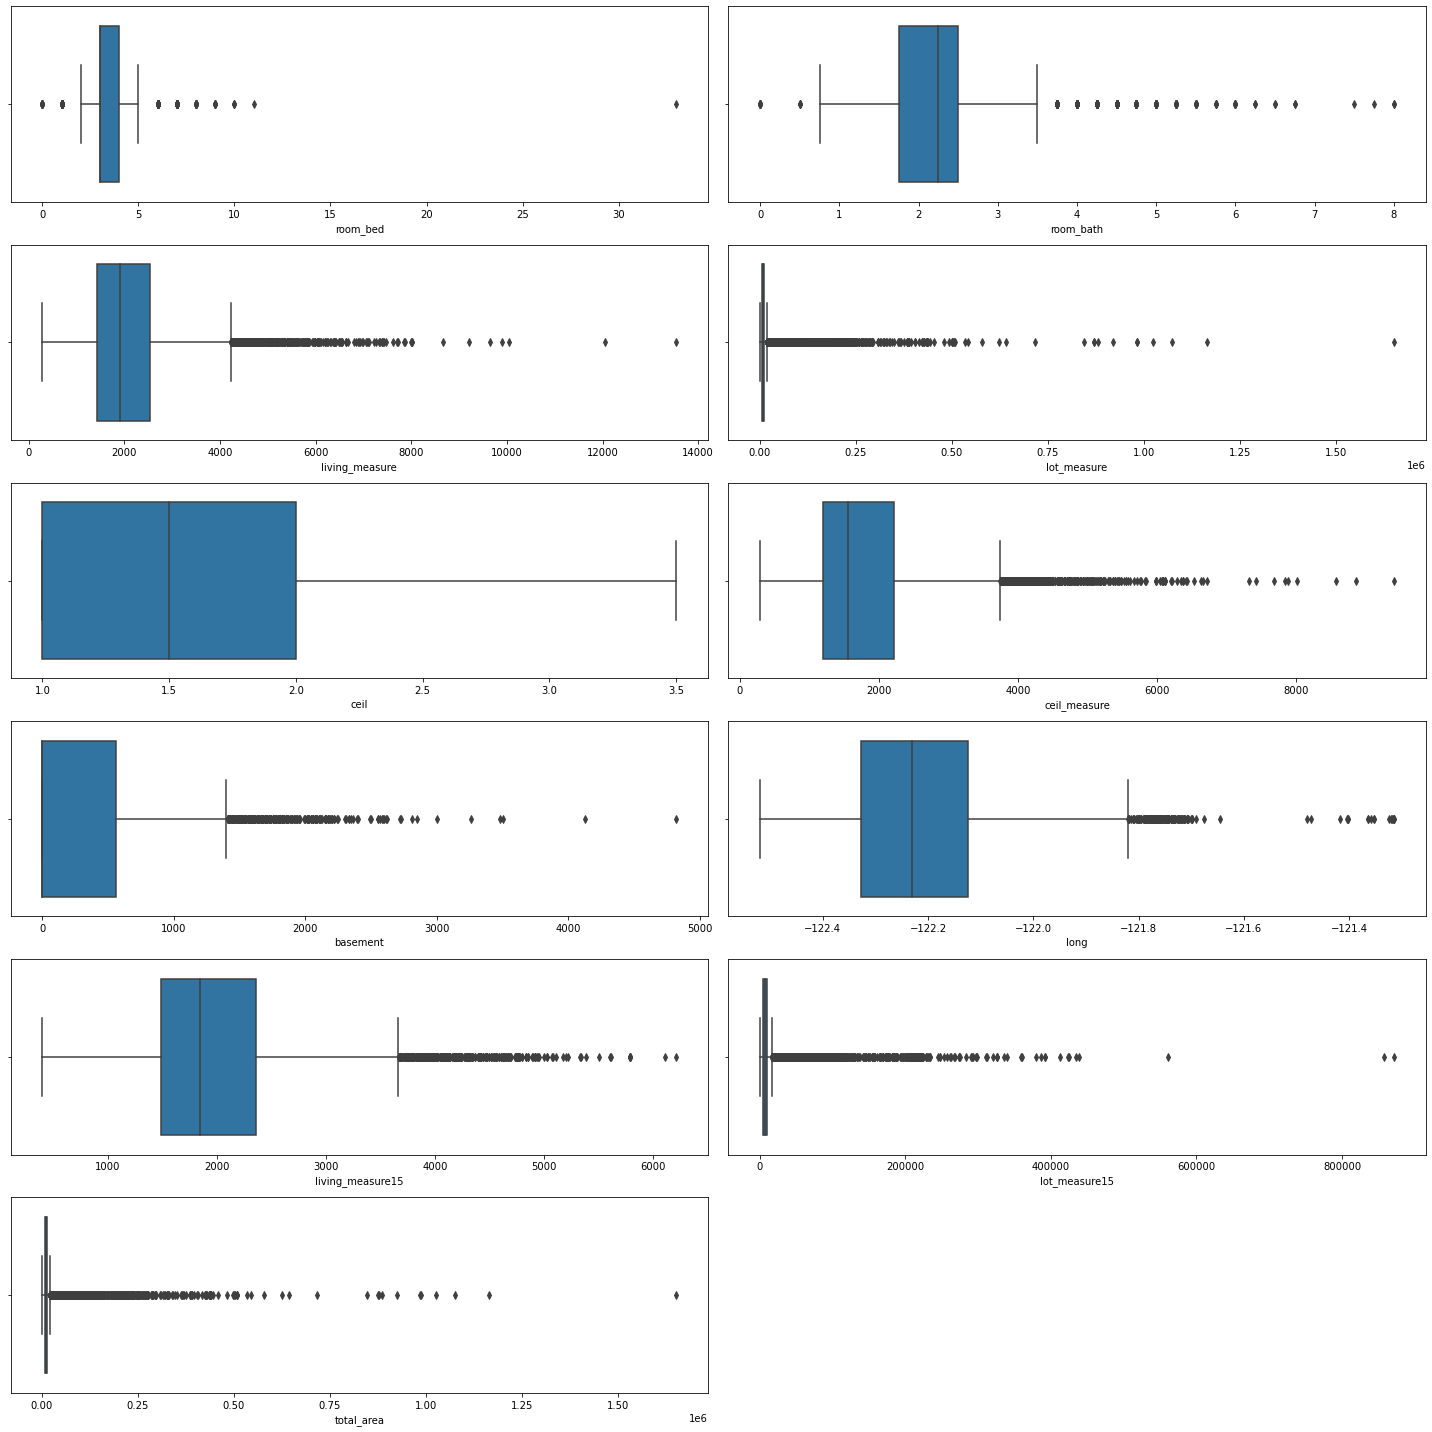

In [33]:
data_plot=df[['room_bed','room_bath', 'living_measure','lot_measure','ceil','ceil_measure','basement','long','living_measure15','lot_measure15','total_area']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Boxplot to check outliers',df.shape)

In [34]:
for column in ['ceil']:
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)

In [35]:
for column in [['room_bed','room_bath', 'living_measure','lot_measure','ceil_measure','basement','long','living_measure15','lot_measure15','total_area']]:
    median = df[column].median()
    df[column] = df[column].fillna(median)
    

In [36]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
month               0
year                0
dtype: int64

In [37]:
#Analyzing CID
cid_cnt=df.cid.value_counts()
cid_cnt[cid_cnt>1].shape

(176,)

In [38]:
new_df=df.copy()
new_df.dayhours=new_df.dayhours.replace('T000000', "")
new_df.dayhours=pd.to_datetime(new_df.dayhours,format='%Y%m%d')
new_df['month_year']=new_df['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
new_df['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [39]:
new_df['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

In [40]:
new_df.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        561933.463021
August-2014       536527.039691
December-2014     524602.893270
February-2015     507919.603200
January-2015      525963.251534
July-2014         544892.161013
June-2014         558123.736239
March-2015        544057.683200
May-2014          548166.600113
May-2015          558193.095975
November-2014     522058.861800
October-2014      539127.477636
September-2014    529315.868095
Name: price, dtype: float64

# Exploratory data analysis

# Univariate analysis

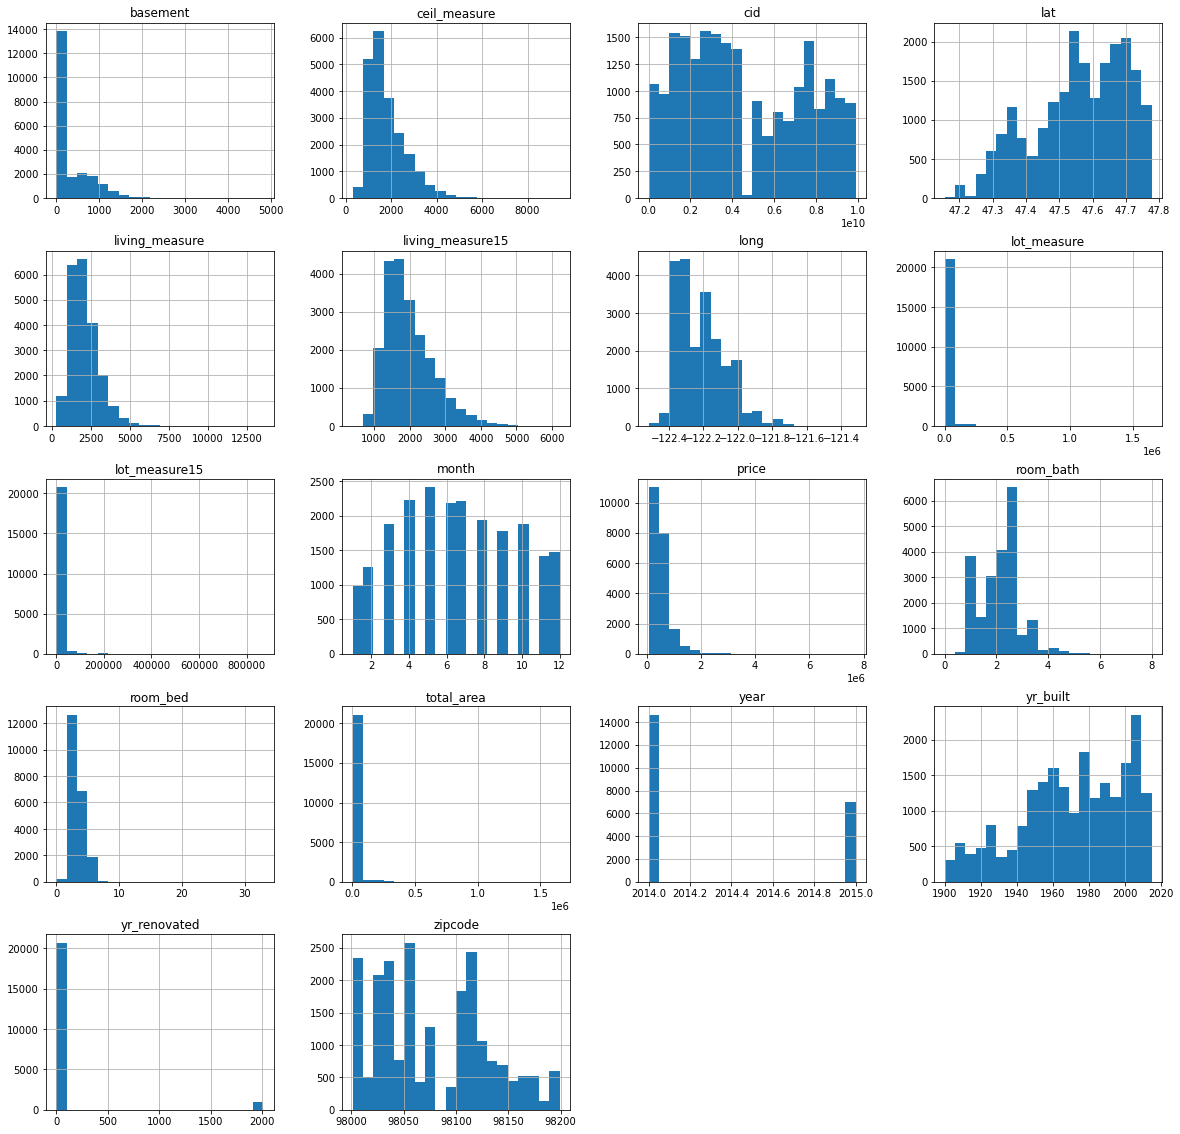

In [41]:
# Histogram of the numeric columns
df[num].hist(bins=20, figsize=(20,20))
plt.show()

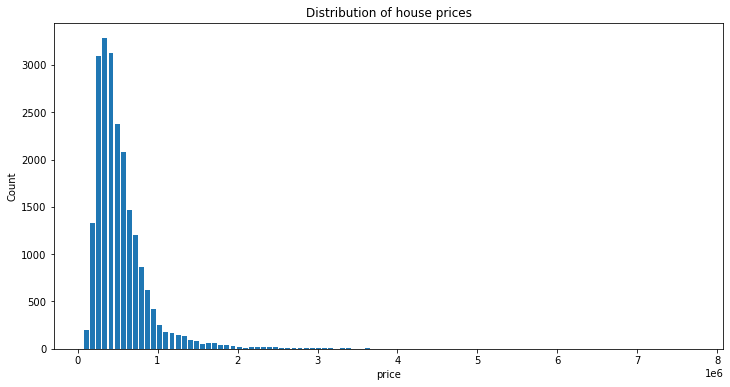

In [42]:
plt.figure(figsize=(12,6))
plt.hist(df.price, bins=100, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.title('Distribution of house prices')
plt.show()

<ipython-input-43-d5eadc58bac9>:22: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


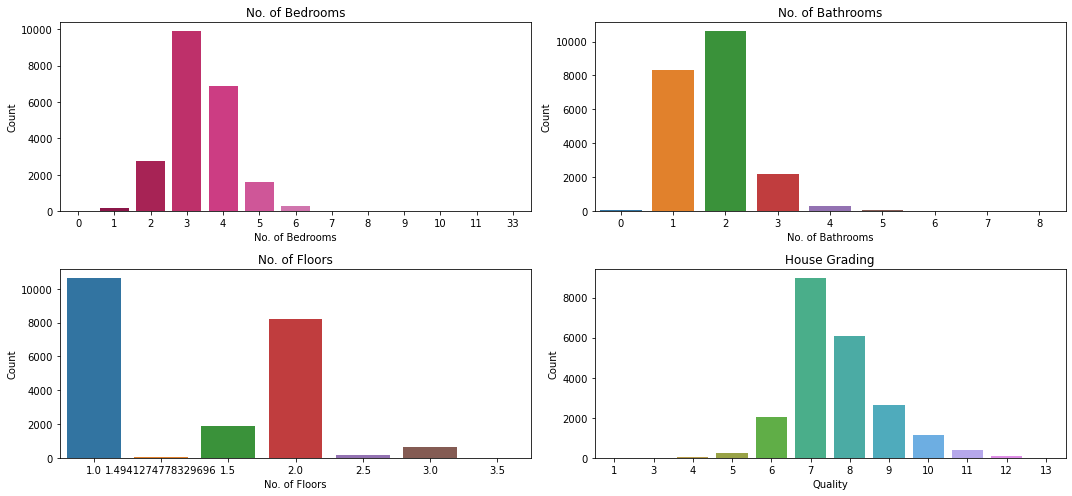

In [43]:
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(df['room_bed'].astype('int64'), palette = 'PuRd_r')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Count')
plt.title('No. of Bedrooms')
fig.add_subplot(2,2,2)
sns.countplot(df['room_bath'].astype('int64'))
plt.xlabel('No. of Bathrooms')
plt.ylabel('Count')
plt.title('No. of Bathrooms')
fig.add_subplot(2,2,3)
sns.countplot(df['ceil'])
plt.xlabel('No. of Floors')
plt.ylabel('Count')
plt.title('No. of Floors')
fig.add_subplot(2,2,4)
sns.countplot(df['quality'].astype('int64'))
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('House Grading')
plt.tight_layout()

<ipython-input-44-06cdb868dfc0>:22: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


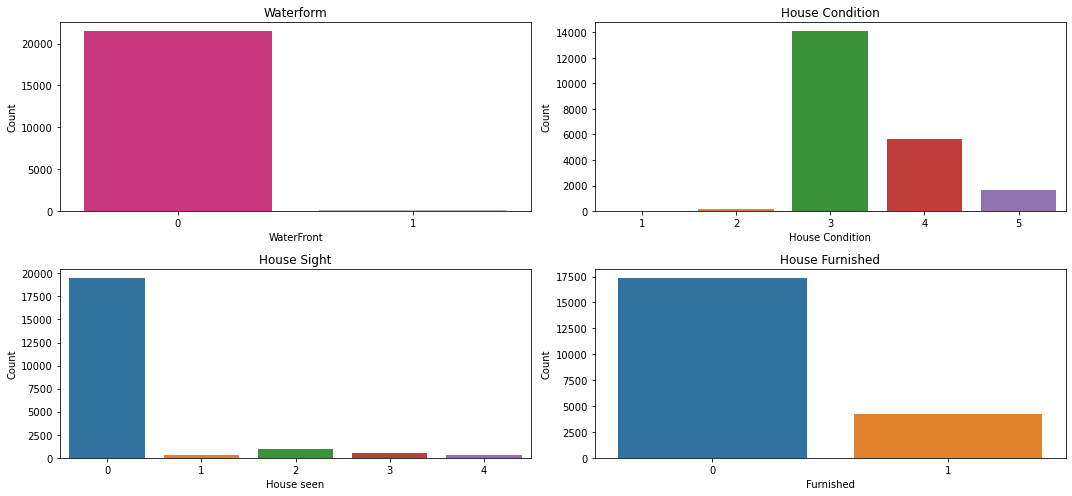

In [44]:
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(df['coast'].astype('int64'), palette = 'PuRd_r')
plt.xlabel('WaterFront')
plt.ylabel('Count')
plt.title('Waterform')
fig.add_subplot(2,2,2)
sns.countplot(df['condition'].astype('int64'))
plt.xlabel('House Condition')
plt.ylabel('Count')
plt.title('House Condition')
fig.add_subplot(2,2,3)
sns.countplot(df['sight'].astype('int64'))
plt.xlabel('House seen')
plt.ylabel('Count')
plt.title('House Sight')
fig.add_subplot(2,2,4)
sns.countplot(df['furnished'].astype('int64'))
plt.xlabel('Furnished')
plt.ylabel('Count')
plt.title('House Furnished')
plt.tight_layout()

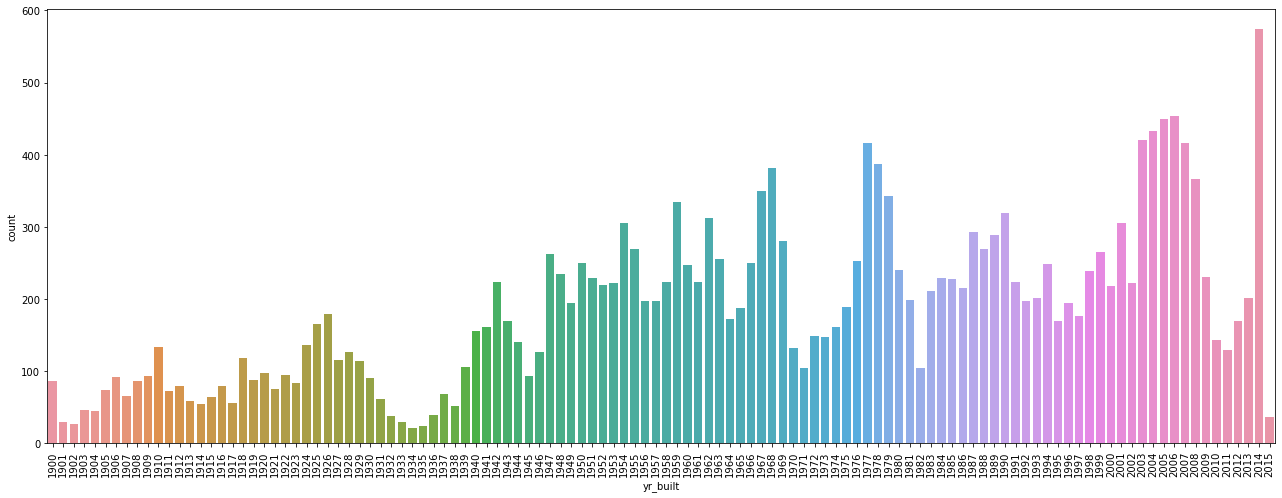

In [45]:
plt.figure(figsize=(22,8))
sns.countplot(df.yr_built.astype('int64'))
plt.xticks(rotation=90)
plt.show()

House price based on the number of floors

# Bivarient Analysis

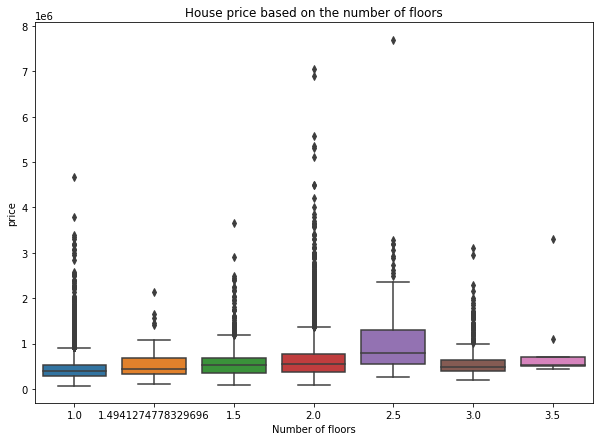

In [46]:
plt.figure(figsize=(10,7))

sns.boxplot(x='ceil',y='price',data=df)
plt.title('House price based on the number of floors')
plt.xlabel('Number of floors')
plt.show()

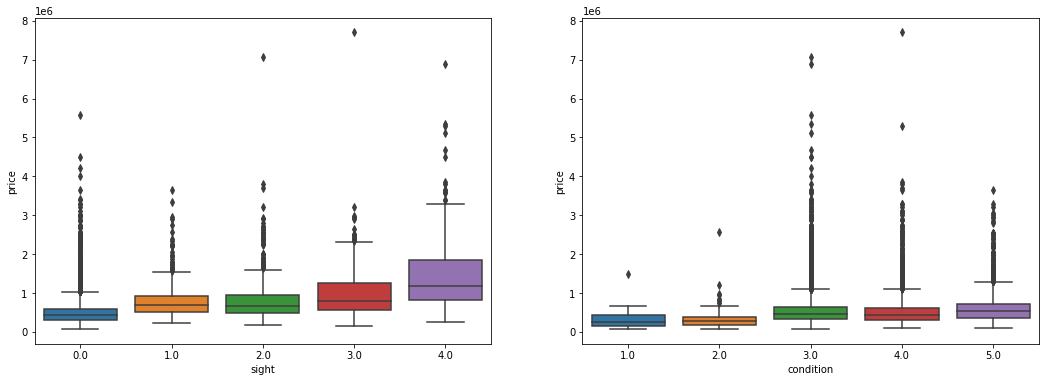

In [47]:
fig,ax = plt.subplots(ncols=2,figsize=(18,6))

sns.boxplot(x='sight',y='price',data=df,ax=ax[0])
sns.boxplot(x='condition',y='price',data=df,ax=ax[1])

plt.show()

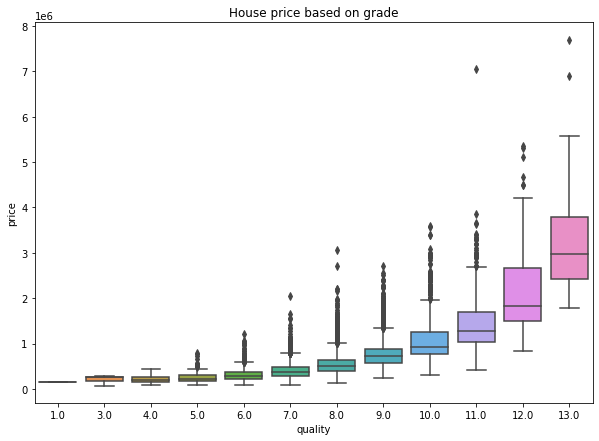

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot(x='quality',y='price',data=df)

plt.title('House price based on grade')
plt.show()

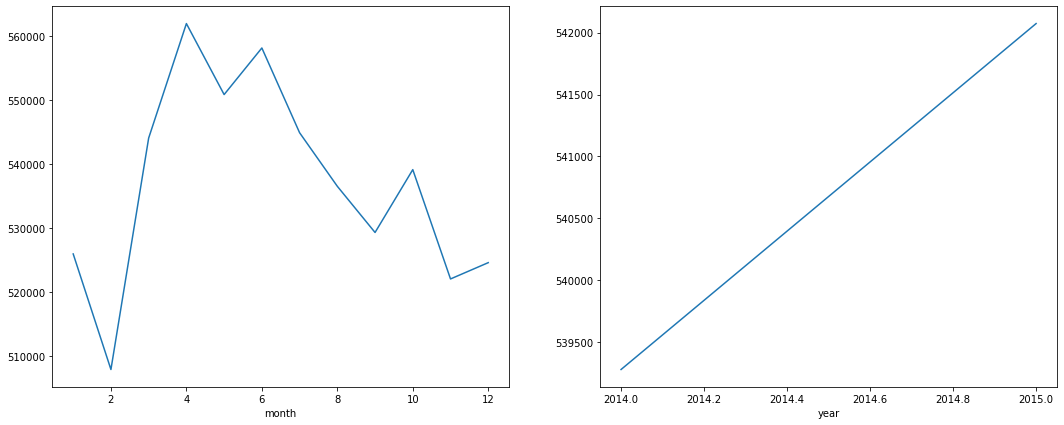

In [49]:
# data visualization house price vs months and years
fig = plt.figure(figsize=(18,7))
fig.add_subplot(1,2,2)
df.groupby('year').mean()['price'].plot()
fig.add_subplot(1,2,1)
df.groupby('month').mean()['price'].plot()


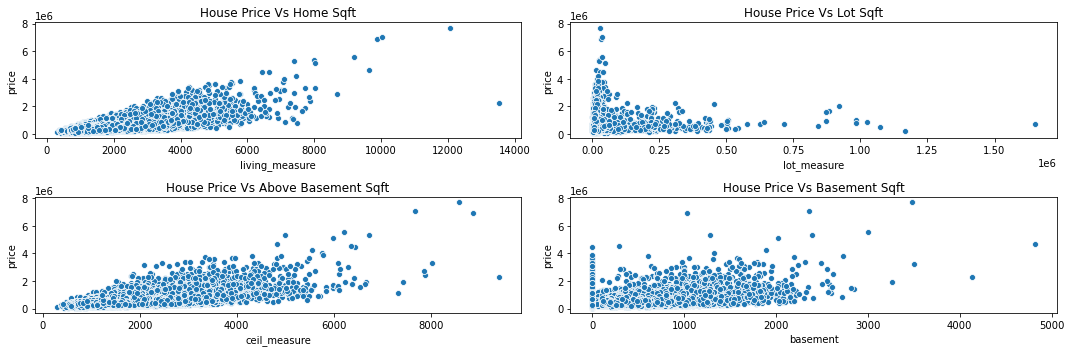

In [50]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(15,5))
fig.add_subplot(2,2,1)
sns.scatterplot(df['living_measure'], df['price'])
plt.title('House Price Vs Home Sqft')
fig.add_subplot(2,2,2)
sns.scatterplot(df['lot_measure'],df['price'])
plt.title('House Price Vs Lot Sqft')
fig.add_subplot(2,2,3)
sns.scatterplot(df['ceil_measure'],df['price'])
plt.title('House Price Vs Above Basement Sqft')
fig.add_subplot(2,2,4)
sns.scatterplot(df['basement'],df['price'])
plt.title('House Price Vs Basement Sqft')
plt.tight_layout()

Insight
We can see that there is a linear relationship between the living space and house price.
In terms of lot space and price, we cant see that much relationship between these two variables.

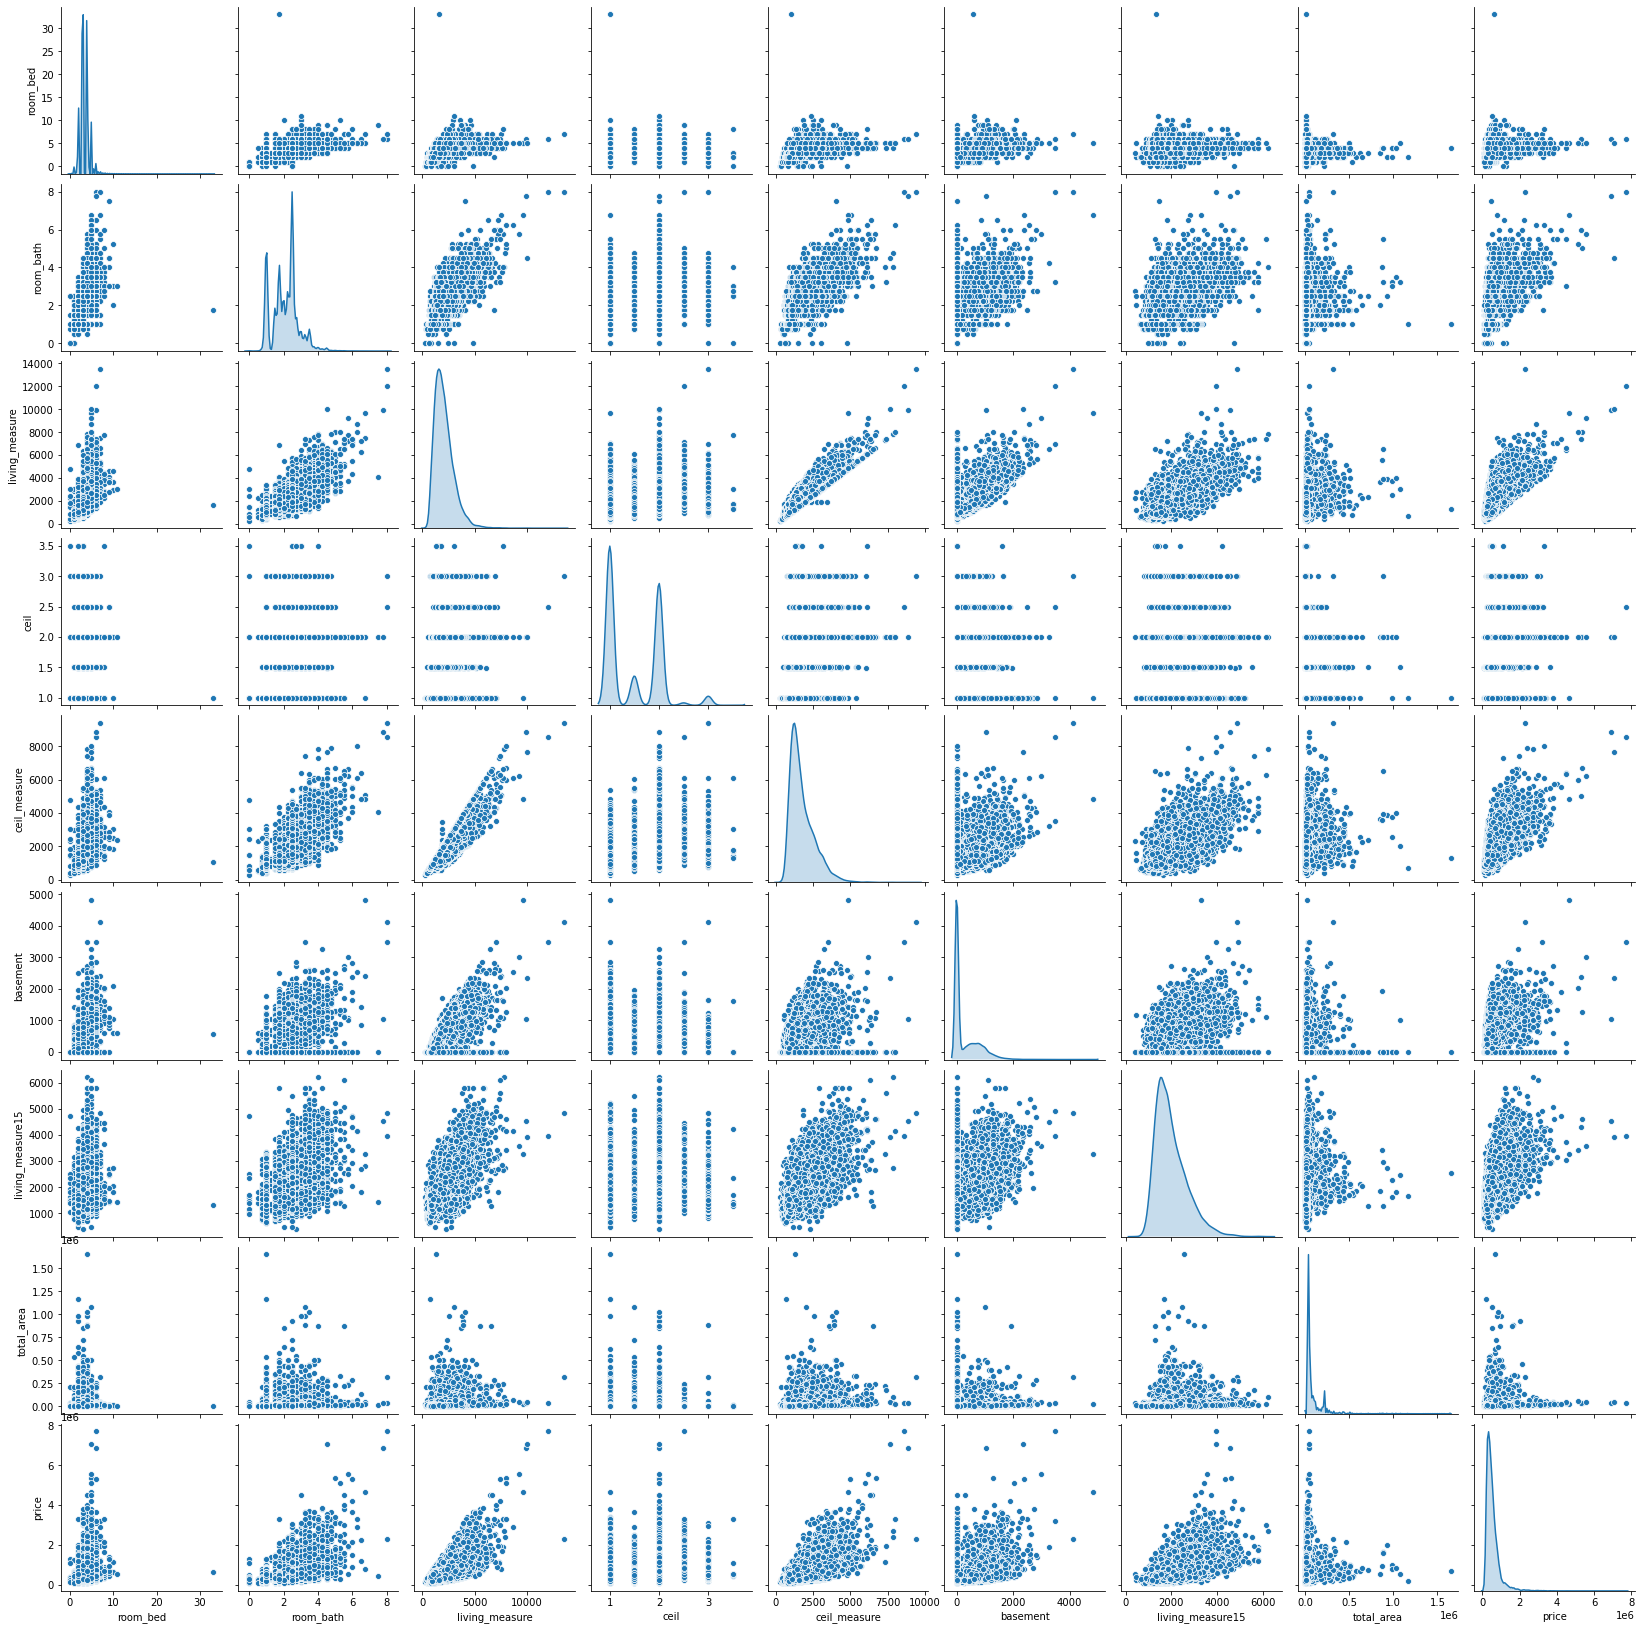

In [51]:
sns.pairplot(df[['room_bed', 'room_bath', 'living_measure', 'ceil', 'ceil_measure', 'basement', 'living_measure15', 'total_area','price']],diag_kind='kde')

# Correlation Plot

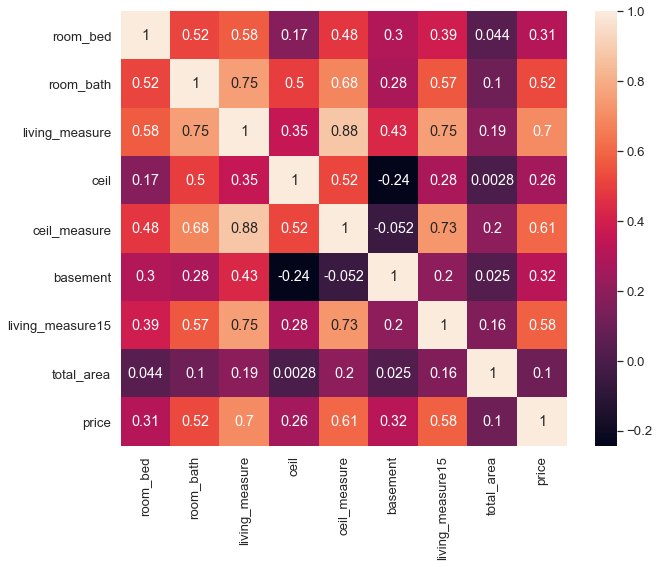

In [52]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['room_bed', 'room_bath', 'living_measure', 'ceil', 'ceil_measure', 'basement', 'living_measure15', 'total_area','price']].corr(), annot=True)
plt.show()

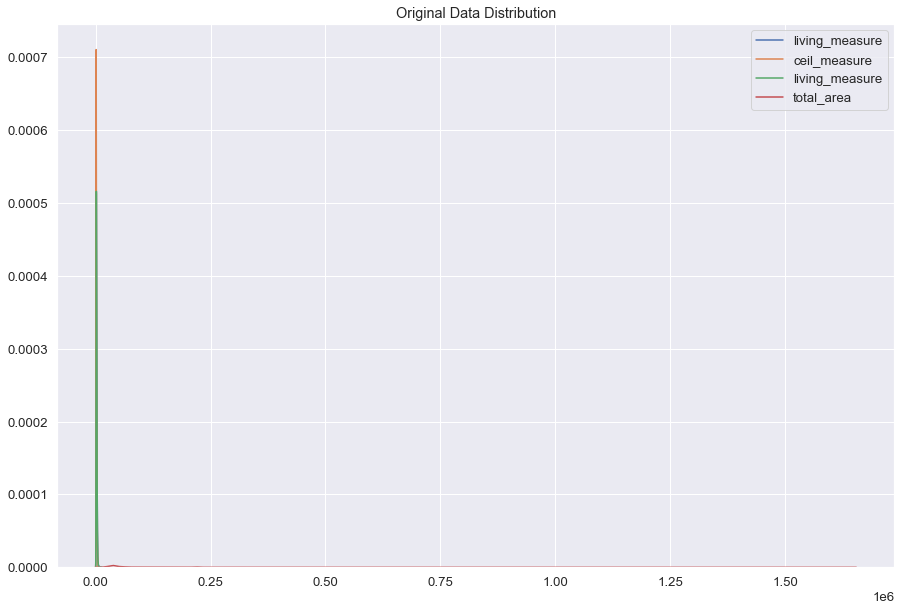

In [53]:
fig, (ax1) = plt.subplots(ncols=1,figsize=(15,10))
ax1.set_title('Original Data Distribution')
sns.kdeplot(df['living_measure'],ax=ax1)
sns.kdeplot(df['ceil_measure'],ax=ax1)
sns.kdeplot(df['living_measure'],ax=ax1)
sns.kdeplot(df['total_area'],ax=ax1)

# Checking Outliers

Shape before Outliers Treatment (21613, 25)


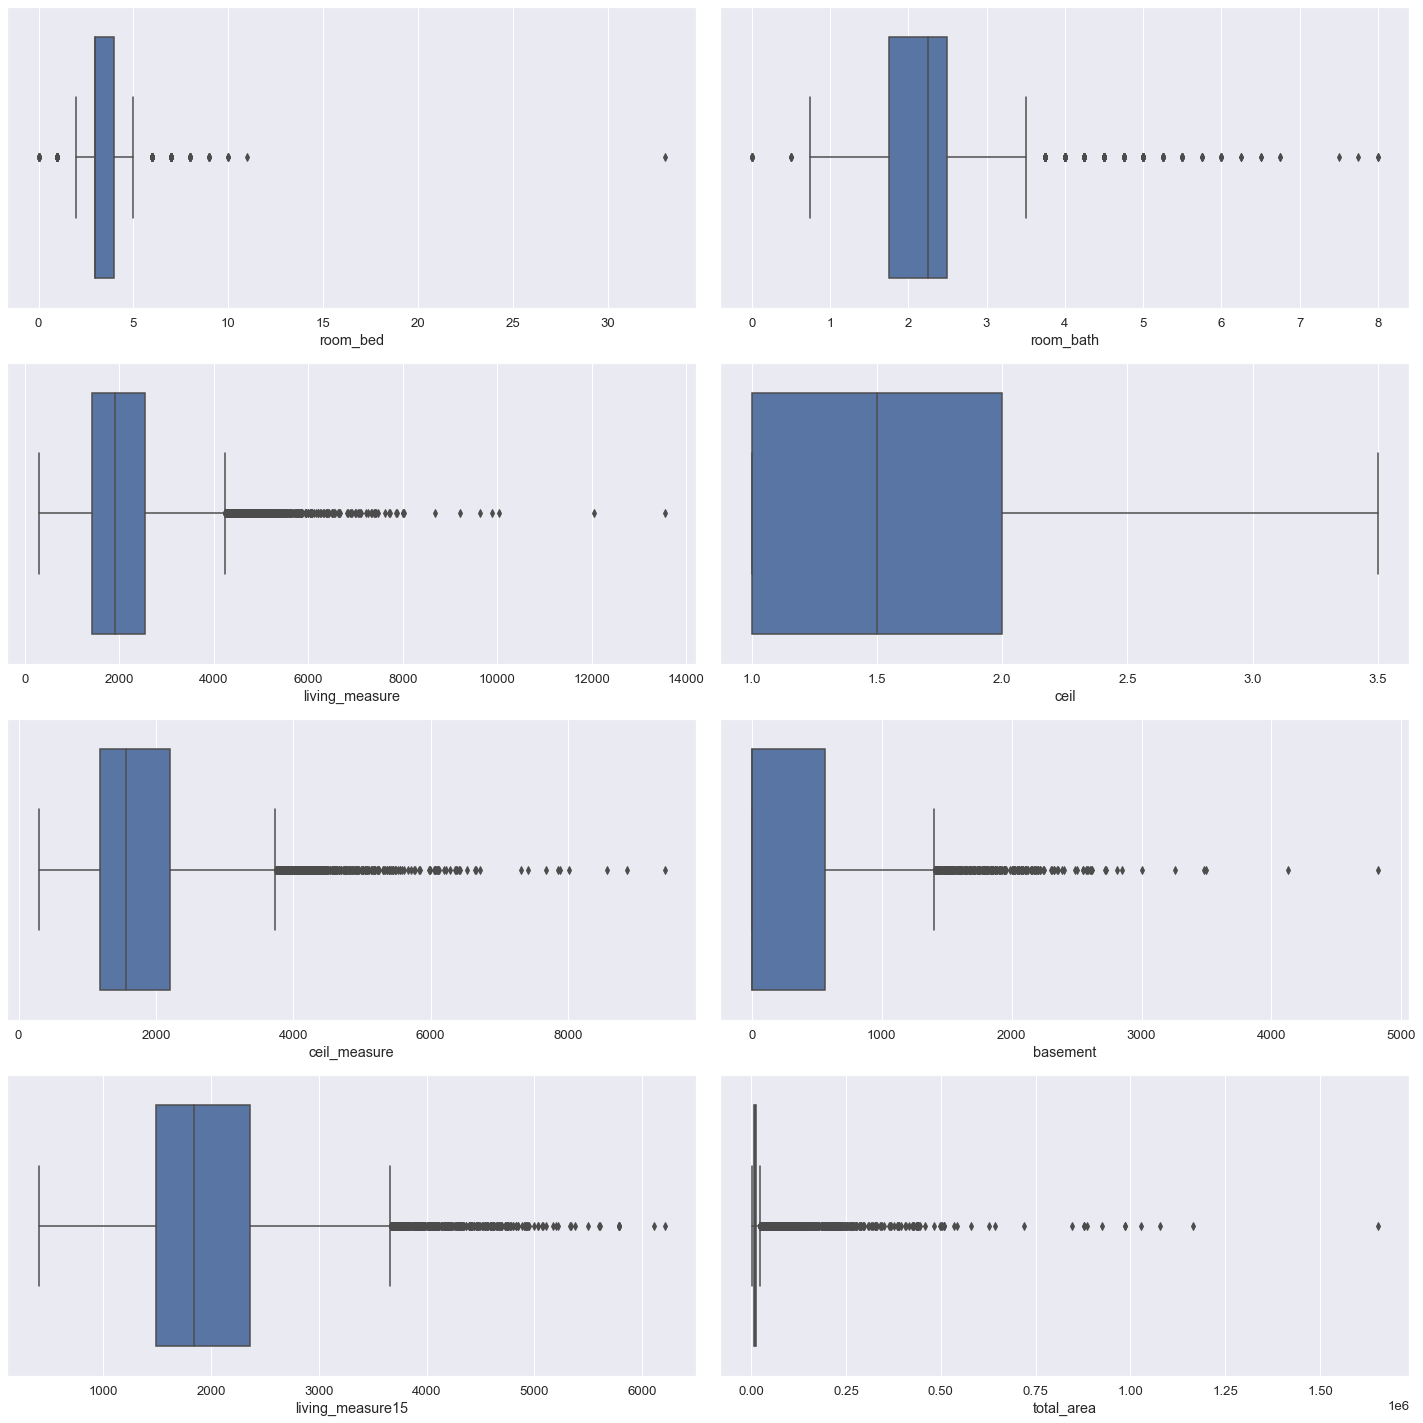

In [54]:
data_plot=df[['room_bed', 'room_bath', 'living_measure', 'ceil', 'ceil_measure', 'basement', 'living_measure15', 'total_area']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)

In [55]:
def treat_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [56]:
for features in df[['room_bed', 'room_bath', 'living_measure', 'ceil_measure', 'basement', 'living_measure15', 'total_area']]:
    lr,ur = treat_outliers(df[features])
    df[features]=np.where(df[features]>ur,ur,df[features])
    df[features]=np.where(df[features]<lr,lr,df[features])

Shape after Outliers Treatment (21613, 25)


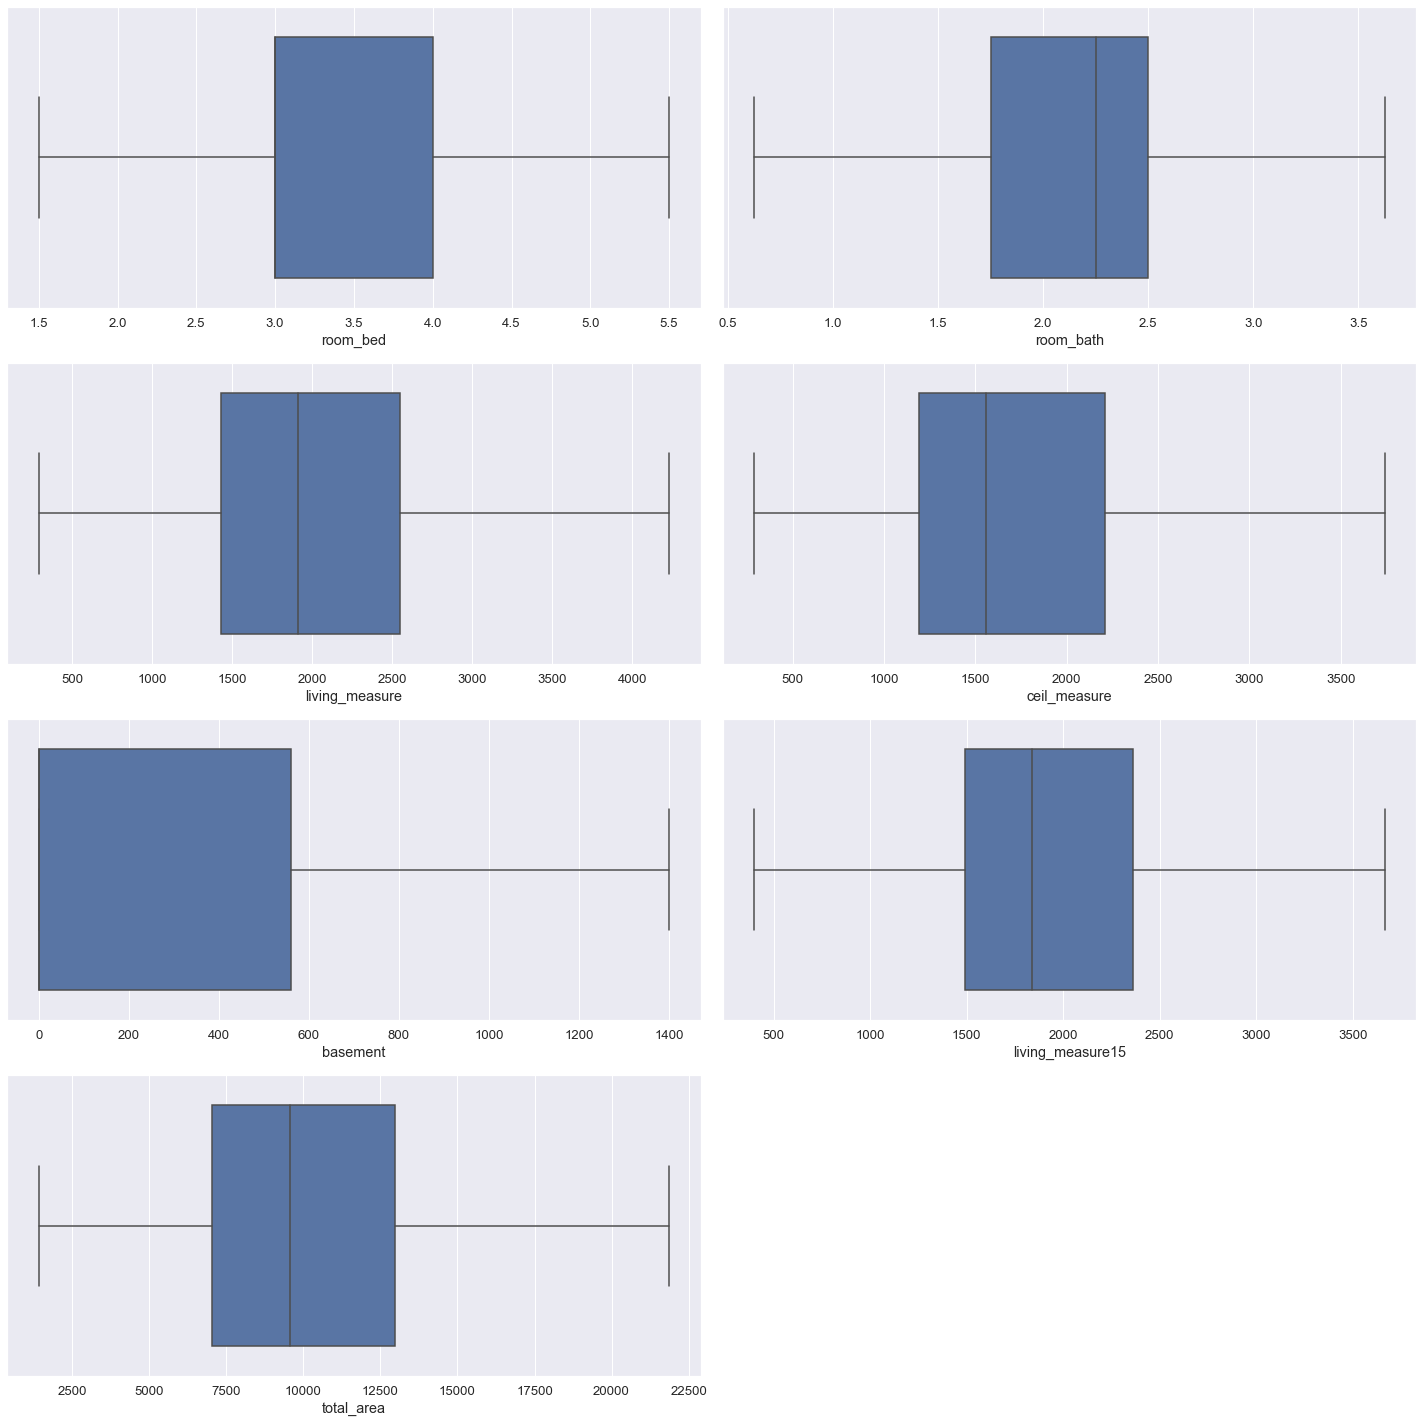

In [57]:
data_plot=df[['room_bed', 'room_bath', 'living_measure', 'ceil_measure', 'basement', 'living_measure15', 'total_area']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',df.shape)

# Removal of unwanted variables

Following are the features that we will drop from the dataframe.

id - IDs are not needed for training.
date - The date in this particular dataset are only limited to 2014 and 2015 and will not likely to contribute to price.
zipcode,sqft_living15,sqft_lot15 - these features are also not needed

In [58]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'month', 'year'],
      dtype='object')

In [59]:
df.drop(['cid','dayhours','zipcode','condition','long','lat','lot_measure15','yr_built','yr_renovated','month','year'],axis=1,inplace=True)

In [60]:
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,quality,ceil_measure,basement,living_measure15,furnished,total_area
0,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,8.0,1800.0,1250.0,2020.0,0.0,12490.0
1,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,6.0,670.0,0.0,1660.0,0.0,3771.0
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,8.0,3040.0,0.0,2620.0,0.0,5455.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,8.0,1740.0,0.0,2030.0,0.0,5461.0
4,450000,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,7.0,1120.0,0.0,1120.0,0.0,5710.0


# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x = df.drop('price',axis=1)
y = df[['price']]

In [63]:
x.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,quality,ceil_measure,basement,living_measure15,furnished,total_area
0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,8.0,1800.0,1250.0,2020.0,0.0,12490.0
1,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,6.0,670.0,0.0,1660.0,0.0,3771.0
2,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,8.0,3040.0,0.0,2620.0,0.0,5455.0
3,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,8.0,1740.0,0.0,2030.0,0.0,5461.0
4,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,7.0,1120.0,0.0,1120.0,0.0,5710.0


In [64]:
y.head()

,price
0,600000
1,190000
2,735000
3,257000
4,450000


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=0)

In [66]:
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (17290, 13)
x_test:  (4323, 13)
y_train:  (17290, 1)
y_test:  (4323, 1)


# Apply Linear Regression Model -Without Scaling

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [69]:
for idx,col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name,reg_model.coef_[0][idx]))

The coefficient for room_bed is -14149.017995247174
The coefficient for room_bath is -35779.767399377466
The coefficient for living_measure is -212.11067668522884
The coefficient for lot_measure is -0.04380875396423235
The coefficient for ceil is -21890.69941663894
The coefficient for coast is 609744.920188363
The coefficient for sight is 69227.6309618518
The coefficient for quality is 118058.90606978774
The coefficient for ceil_measure is 361.90289554862363
The coefficient for basement is 417.15947348031045
The coefficient for living_measure15 is 25.46839730938089
The coefficient for furnished is 49840.64159328271
The coefficient for total_area is -4.49963832335999


In [70]:
#evaluate the model (intercept and slope)
reg_model.intercept_[0]

-561954.8917119098

# Calculating R square of train and test sets:

In [71]:
reg_model.score(x_train,y_train)

0.5741252924654356

The R^2 value is 0.57 approx, i.e., the independent variables can explain 57 %of the variations.

In [72]:
reg_model.score(x_test,y_test)

0.5691698526057793

# RMSE on Test and Train set:

In [73]:
predicted_train = reg_model.fit(x_train,y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

240905.46228581117

In [74]:
predicted_test = reg_model.fit(x_test,y_test).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

233191.8379085996

In [75]:
predicted_test = reg_model.fit(x_test,y_test).predict(x_test)

In [76]:
y_pred = reg_model.predict(x_test)

In [77]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 148693.112684987
MSE: 54378433267.1906
RMSE: 233191.8379085996
VarScore: 0.5803209268940861


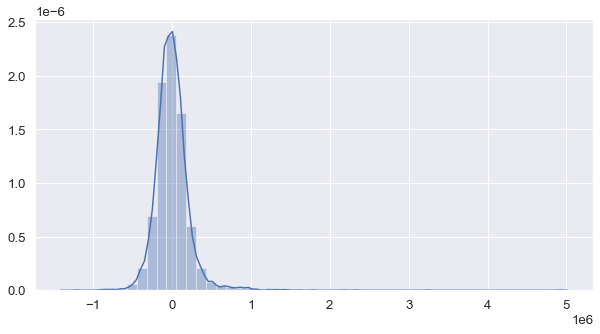

In [78]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test - y_pred)
sns.distplot(residuals)

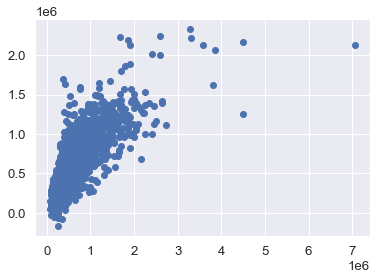

In [79]:
plt.scatter(y_test['price'],y_pred)

In [80]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Density')

    plt.show()
    plt.close()

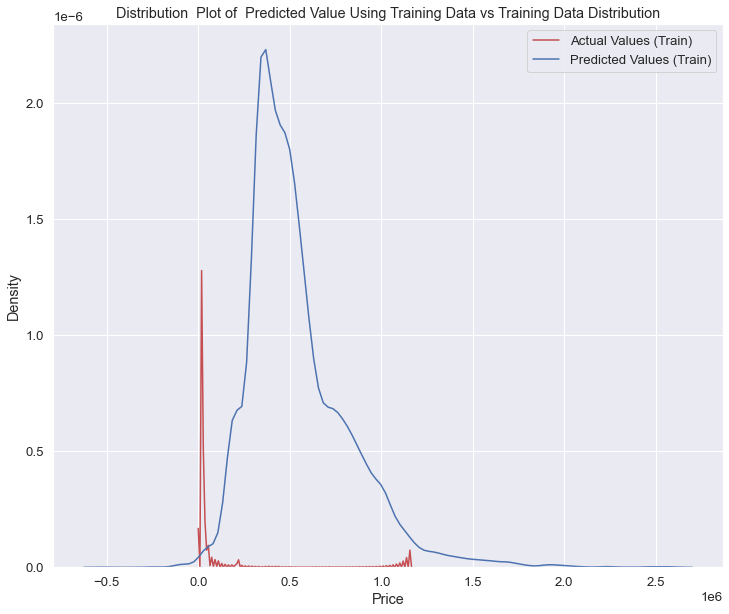

In [81]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(x_train, predicted_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

# Using Statmodel

In [82]:
data_train = pd.concat([x_train,y_train],axis=1)
data_train.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,quality,ceil_measure,basement,living_measure15,furnished,total_area,price
5268,4.0,3.625,4230.0,10320.0,2.0,0.0,0.0,11.0,3740.0,0.0,3010.0,1.0,15380.0,2150000
16909,3.0,3.250,1730.0,1229.0,2.0,0.0,2.0,9.0,1320.0,410.0,1710.0,1.0,2959.0,645000
16123,3.0,3.500,1890.0,1710.0,2.0,0.0,0.0,8.0,1640.0,250.0,1680.0,0.0,3600.0,587206
12181,3.0,2.250,1780.0,191228.0,2.0,0.0,2.0,8.0,1780.0,0.0,2440.0,0.0,21865.0,545000
12617,3.0,2.500,1460.0,1613.0,2.0,0.0,0.0,8.0,1180.0,280.0,1460.0,0.0,3073.0,544000


In [83]:
import statsmodels.formula.api as smf
lml = smf.ols(formula= 'price ~ room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+quality+ceil_measure+basement+living_measure15+furnished+total_area',data=data_train).fit()
lml.params

Intercept          -561954.891712
room_bed            -14149.017995
room_bath           -35779.767399
living_measure        -212.110677
lot_measure             -0.043809
ceil                -21890.699417
coast               609744.920188
sight                69227.630962
quality             118058.906070
ceil_measure           361.902896
basement               417.159473
living_measure15        25.468397
furnished            49840.641593
total_area              -4.499638
dtype: float64

In [84]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     1792.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:43:48   Log-Likelihood:            -2.3879e+05
No. Observations:               17290   AIC:                         4.776e+05
Df Residuals:                   17276   BIC:                         4.777e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -5.62e+05    2.1e+04  

# Feature Scalling - Applying zscaler

In [85]:
from scipy.stats import zscore
x_train_scaled = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

# Apply Linear Regression Model -With Scaling

In [86]:
reg_model = LinearRegression()
reg_model.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [87]:
for idx,col_name in enumerate(x_train_scaled):
    print("The coefficient for {} is {}".format(col_name,reg_model.coef_[0][idx]))

The coefficient for room_bed is -0.03267045894084995
The coefficient for room_bath is -0.06989507354937197
The coefficient for living_measure is -0.4829025024420837
The coefficient for lot_measure is -0.0047099450082938215
The coefficient for ceil is -0.032055196695125236
The coefficient for coast is 0.13937756443852073
The coefficient for sight is 0.14307529343044367
The coefficient for quality is 0.37788436747139037
The coefficient for ceil_measure is 0.7522610446155816
The coefficient for basement is 0.471464597620685
The coefficient for living_measure15 is 0.044915301709702975
The coefficient for furnished is 0.05403474858500768
The coefficient for total_area is -0.06585038965681345


In [88]:
reg_model.intercept_[0]

3.363455917187121e-17

# Calculating R square of train and test sets:

In [89]:
R_square_reg2_train = reg_model.score(x_train_scaled,y_train_scaled)

In [90]:
R_square_reg2_test = reg_model.score(x_test_scaled,y_test_scaled)

# RMSE on Test and Train set:

In [91]:
predicted_train = reg_model.fit(x_train_scaled,y_train_scaled).predict(x_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))
mse_train = metrics.mean_squared_error(y_train_scaled,predicted_train)

In [92]:
predicted_test = reg_model.fit(x_test_scaled,y_test_scaled).predict(x_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))
mse_test = metrics.mean_squared_error(y_test_scaled,predicted_test)

In [93]:
y_pred_test = reg_model.predict(x_test_scaled)
y_pred_train = reg_model.predict(x_train_scaled)

In [94]:
# evaluate the performance of the algorithm
from sklearn import metrics
mae_reg2_test = metrics.mean_absolute_error(y_test_scaled, y_pred_test)
mae_reg2_train = metrics.mean_absolute_error(y_train_scaled,y_pred_train)

In [95]:
print('Mean Square Error reg2 test ', mse_test)
print('Mean Square Error reg2 train', mse_train)
print('Mean absolute error reg2 test ', mae_reg2_test)
print('Mean absolute error reg2 train ',mae_reg2_train)

Mean Square Error reg2 test  0.41967907310591385
Mean Square Error reg2 train 0.42587470753456436
Mean absolute error reg2 test  0.41308189874092005
Mean absolute error reg2 train  0.41549105506462686


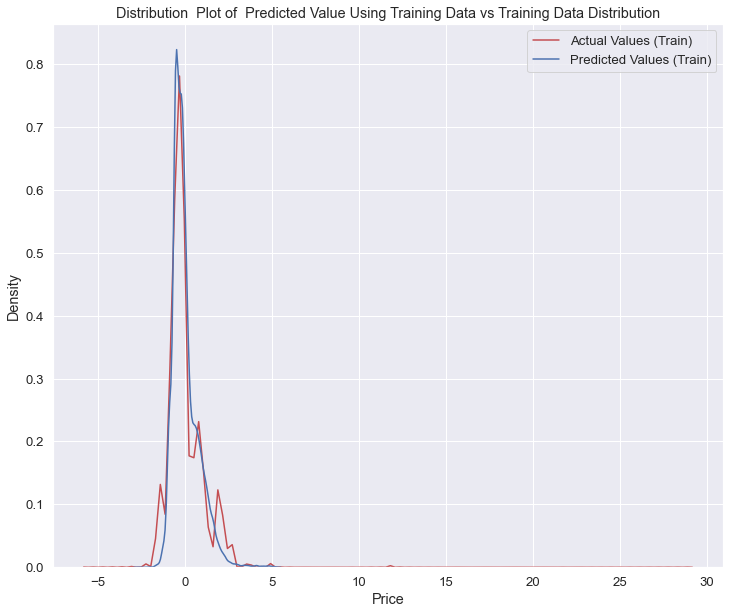

In [96]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(x_train_scaled, y_pred_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

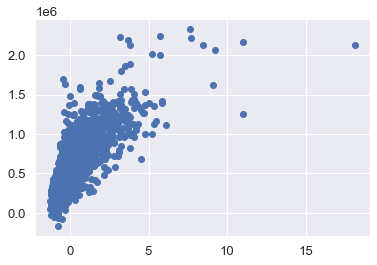

In [97]:
plt.scatter(y_test_scaled['price'],y_pred)

# Building Support Vector Regression(SVR)

In [98]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
import math

In [99]:
base_svr_model = SVR()

In [100]:
base_svr_model.fit(x_train_scaled,y_train_scaled)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [101]:
ytrain_predict = base_svr_model.predict(x_train_scaled)
ytest_predict = base_svr_model.predict(x_test_scaled)

In [102]:
# evaluate the performance of the algorithm
from sklearn import metrics
mae_svr_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_svr_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [103]:
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

In [104]:
scores = cross_validate(base_svr_model, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [105]:

R_square_svr_test=abs(scores['test_squared_error'].mean())
R_square_svr_trian = abs(scores['train_squared_error'].mean())

In [106]:
scores['train_squared_error']

array([-0.29931186, -0.29822226, -0.30040686, -0.29937442, -0.29744586,
       -0.2921246 , -0.29316399, -0.28454881, -0.29698458, -0.30011442])

In [107]:
scores['test_squared_error']

array([-0.31329764, -0.31217988, -0.28027116, -0.28008763, -0.30434908,
       -0.39817938, -0.34358224, -0.50380819, -0.32377347, -0.27561133])

In [108]:
print('Mean Square svr test ', R_square_svr_test)
print('Mean Square svr train', R_square_svr_trian)
print('Mean absolute error svr test ', mae_svr_test)
print('Mean absolute error svr train ',mae_svr_train)

Mean Square svr test  0.33351400026712397
Mean Square svr train 0.29616976760578567
Mean absolute error svr test  0.3540346904864621
Mean absolute error svr train  0.32930206232296483


# Model Tuning -SVR

In [109]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate

In [110]:
param_grid={
            'C': [0.1, 1,10,100],
            'epsilon': [0.01,0.1],
            'gamma': [0.001,0.01]
        }

In [111]:
  gsc = GridSearchCV(
        estimator=SVR(kernel='rbf')
        ,param_grid = param_grid
        ,cv=5
        ,scoring='neg_mean_squared_error'
        , verbose=0
        , n_jobs=-1)

In [112]:
gsc.fit(x_train_scaled,y_train_scaled)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1],
                         'gamma': [0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [113]:
best_param=gsc.best_params_

In [114]:
best_param

{'C': 100, 'epsilon': 0.1, 'gamma': 0.01}

In [115]:
best_svr_grid = gsc.best_estimator_

In [116]:
best_svr_grid

SVR(C=100, gamma=0.01)

In [117]:
best_svr = SVR(kernel='rbf', C=best_param["C"], epsilon=best_param["epsilon"], gamma=best_param["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [118]:
ytrain_predict = gsc.predict(x_train_scaled)
ytest_predict = gsc.predict(x_test_scaled)

In [119]:
mae_svr_tuned_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_svr_tuned_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [120]:
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

In [121]:
scores = cross_validate(best_svr, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [122]:
R_square_svr_tuned_test=abs(scores['test_squared_error'].mean())
R_square_svr_tuned_trian = abs(scores['train_squared_error'].mean())

In [123]:
print('Mean Sqare Error Tuned SVR test ', R_square_svr_tuned_test)
print('Mean Sqare Error Tuned SVR train', R_square_svr_tuned_trian)
print('Mean absolute error Tuned SVR test ', mae_svr_tuned_test)
print('Mean absolute error Tuned SVR train ',mae_svr_tuned_train)

Mean Sqare Error Tuned SVR test  0.3206659368986463
Mean Sqare Error Tuned SVR train 0.2912535864242086
Mean absolute error Tuned SVR test  0.35608284347744124
Mean absolute error Tuned SVR train  0.33679291860248706


# Bulding RandomForest Regression

In [124]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Fit a random forest with default parameter

In [125]:
base_rfr_model = RandomForestRegressor(random_state=0)

In [126]:
base_rfr_model.fit(x_train_scaled,y_train_scaled)

<ipython-input-126-0e8495464a6e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_rfr_model.fit(x_train_scaled,y_train_scaled)


RandomForestRegressor(random_state=0)

In [127]:
ytrain_predict = base_rfr_model.predict(x_train_scaled)
ytest_predict = base_rfr_model.predict(x_test_scaled)

In [128]:
mae_rfr_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_rfr_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [129]:
# Perform K-Fold CV
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}



scores = cross_validate(base_rfr_model, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selec

In [130]:
R_square_rfr_test=abs(scores['test_squared_error'].mean())
R_square_rfr_trian = abs(scores['train_squared_error'].mean())

In [131]:
print('Mean Sqare Error RFR test ', R_square_rfr_test)
print('Mean Sqare Error RFR train', R_square_rfr_trian)
print('Mean absolute error RFR test ', mae_rfr_test)
print('Mean absolute error RFR train ',mae_rfr_train)

Mean Sqare Error RFR test  0.309559289802788
Mean Sqare Error RFR train 0.04492740886010678
Mean absolute error RFR test  0.3624776368787121
Mean absolute error RFR train  0.13214826440791547


# Model Tuning Random Forest

In [132]:
# Perform Grid-Search
param_grid = {
     'max_depth' : range(3,8),
     'max_features' : range(3,5),
     'min_samples_leaf' : [10,15],
     'min_samples_split' : [50,60,70],
     'n_estimators' : [10,50,100,200,300,1000]
    
}

In [133]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid=param_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

In [134]:
gsc.fit(x_train_scaled,y_train_scaled)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 8), 'max_features': range(3, 5),
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [10, 50, 100, 200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [135]:
ytrain_predict = gsc.predict(x_train_scaled)
ytest_predict = gsc.predict(x_test_scaled)

In [136]:
mae_rfr_tuned_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_rfr_tuned_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [137]:
best_params = gsc.best_params_

In [138]:
best_param

{'C': 100, 'epsilon': 0.1, 'gamma': 0.01}

In [139]:
best_rfr_grid = gsc.best_estimator_

In [140]:
best_rfr_grid

RandomForestRegressor(max_depth=7, max_features=4, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=1000)

In [141]:
best_rfr = RandomForestRegressor(max_depth=best_params["max_depth"],max_features=best_params["max_features"],min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"],n_estimators=best_params["n_estimators"],random_state=False, verbose=False)

In [142]:
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

In [143]:
scores = cross_validate(best_rfr, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selec

In [144]:
R_square_rfr_tuned_test=abs(scores['test_squared_error'].mean())
R_square_rfr_tuned_trian = abs(scores['train_squared_error'].mean())

In [145]:
print('Mean Sqare Error TUNED RFR test ', R_square_rfr_tuned_test)
print('Mean Sqare Error TUNED RFR train', R_square_rfr_tuned_trian)
print('Mean absolute error Tuned RFR test ', mae_rfr_tuned_test)
print('Mean absolute error Tuned RFR train ',mae_rfr_tuned_train)

Mean Sqare Error TUNED RFR test  0.3471920879498813
Mean Sqare Error TUNED RFR train 0.31840916858756463
Mean absolute error Tuned RFR test  0.375228858861629
Mean absolute error Tuned RFR train  0.36385541539845817


# Ridge

In [146]:
from sklearn.linear_model import Ridge

In [147]:
RidgeModel=Ridge(alpha=100)

In [148]:
RidgeModel.fit(x_train_scaled,y_train_scaled)

Ridge(alpha=100)

In [149]:
ytrain_predict = RidgeModel.predict(x_train_scaled)
ytest_predict = RidgeModel.predict(x_test_scaled)

In [150]:
mae_ridge_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_ridge_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [151]:
# Perform K-Fold CV
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}



scores = cross_validate(RidgeModel, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)


In [152]:
R_square_ridge_test=abs(scores['test_squared_error'].mean())
R_square_ridge_trian = abs(scores['train_squared_error'].mean())

In [153]:
print('Mean Sqare Error Ridge test ', R_square_ridge_test)
print('Mean Sqare Error Ridge train', R_square_ridge_trian)
print('Mean absolute error Ridge test ', mae_ridge_test)
print('Mean absolute error Ridge train ',mae_ridge_train)

Mean Sqare Error Ridge test  0.43001501488504007
Mean Sqare Error Ridge train 0.4272559754127642
Mean absolute error Ridge test  0.41857434190306164
Mean absolute error Ridge train  0.4169455094933426


# Lasso

In [154]:
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error

In [177]:
LassoModel=Lasso(alpha=0.1)

In [178]:
LassoModel.fit(x_train_scaled,y_train_scaled)

Lasso(alpha=0.1)

In [179]:
ytrain_predict = LassoModel.predict(x_train_scaled)
ytest_predict = LassoModel.predict(x_test_scaled)

In [180]:
mae_lasso_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_lasso_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [181]:
# Perform K-Fold CV
scoring = {'abs_error': 'neg_mean_absolute_error',
         'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(RidgeModel, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)

In [182]:
R_square_lasso_test=abs(scores['test_squared_error'].mean())
R_square_lasso_trian = abs(scores['train_squared_error'].mean())

In [183]:
print('Mean Sqare Error Lasso test ', R_square_lasso_test)
print('Mean Sqare Error Lasso train', R_square_lasso_trian)
print('Mean absolute error Lasso test ', mae_lasso_test)
print('Mean absolute error Lasso train ',mae_lasso_train)

Mean Sqare Error Lasso test  0.42952694633831784
Mean Sqare Error Lasso train 0.42568413389120485
Mean absolute error Lasso test  0.42076360416462555
Mean absolute error Lasso train  0.41929307816135114


# Gradient Boost

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

In [185]:
GBR = GradientBoostingRegressor()

In [186]:
GBR.fit(x_train_scaled, y_train_scaled)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

In [187]:
ytrain_predict = GBR.predict(x_train_scaled)
ytest_predict = GBR.predict(x_test_scaled)

In [188]:
# Perform K-Fold CV
scoring = {'abs_error': 'neg_mean_absolute_error',
         'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(GBR, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [189]:
R_square_gbr_test=abs(scores['test_squared_error'].mean())
R_square_gbr_trian = abs(scores['train_squared_error'].mean())

In [190]:
mae_gbr_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_gbr_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [191]:
print('Mean Sqare Error GBR test ', R_square_gbr_test)
print('Mean Sqare Error GBR train', R_square_gbr_trian)
print('Mean absolute error GBR test ', mae_gbr_test)
print('Mean absolute error GBR train ',mae_gbr_train)

Mean Sqare Error GBR test  0.31060513745534885
Mean Sqare Error GBR train 0.265985293524328
Mean absolute error GBR test  0.3667415484227126
Mean absolute error GBR train  0.3491639704935837


# Hyperpararmeter Tuning - Gradient Boost

In [107]:
# Perform Grid-Search
param_grid = {
     'max_depth' : range(3,5),
     'max_features' : ['sqrt'],
     'min_samples_leaf' : [10,15],
     'learning_rate' : [0.01,0.02,0.05],
     'n_estimators' : [200,300,1000]
    
}

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
gbr = GridSearchCV(
        estimator=GradientBoostingRegressor(),
        param_grid=param_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=0)

In [113]:
gbr.fit(x_train_scaled, y_train_scaled.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': range(3, 5), 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 15],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [116]:
ytrain_predict = gbr.predict(x_train_scaled)
ytest_predict = gbr.predict(x_test_scaled)

In [128]:
mae_gbr_tuned_test = metrics.mean_absolute_error(y_test_scaled, ytest_predict)
mae_gbr_tuned_train = metrics.mean_absolute_error(y_train_scaled,ytrain_predict)

In [119]:
best_params = gbr.best_params_

In [120]:
best_params

{'learning_rate': 0.02,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'n_estimators': 1000}

In [121]:
best_gbr_tuned_grid = gbr.best_estimator_

In [122]:
best_gbr_tuned_grid

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, max_features='sqrt',
                          min_samples_leaf=15, n_estimators=1000)

In [123]:
best_gbr = GradientBoostingRegressor(max_depth=best_params["max_depth"],max_features=best_params["max_features"],min_samples_leaf=best_params["min_samples_leaf"],learning_rate=best_params["learning_rate"],n_estimators=best_params["n_estimators"],random_state=False, verbose=False)

In [124]:
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

In [201]:
scores = cross_validate(best_gbr, x_train_scaled, y_train_scaled, cv=10, scoring=scoring, return_train_score=True)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [202]:
mean_square_gbr_tuned_test=abs(scores['test_squared_error'].mean())
mean_square_gbr_tuned_trian = abs(scores['train_squared_error'].mean())

In [203]:
scores['test_squared_error']

array([-0.3021832 , -0.299237  , -0.25550423, -0.26434936, -0.27576472,
       -0.35357672, -0.29981617, -0.38581158, -0.29861074, -0.26643391])

In [204]:
scores['train_squared_error']

array([-0.22853585, -0.2285429 , -0.23205995, -0.23165985, -0.23079607,
       -0.22458547, -0.22738451, -0.2239404 , -0.22632339, -0.23230371])

In [129]:
print('Mean Sqare Error GBR test ', mean_square_gbr_tuned_test)
print('Mean Sqare Error GBR train', mean_square_gbr_tuned_trian)
print('Mean absolute error GBR test ', mae_gbr_tuned_test)
print('Mean absolute error GBR train ',mae_gbr_tuned_train)

Mean Sqare Error GBR test  0.300128761802616
Mean Sqare Error GBR train 0.22861321040891602
Mean absolute error GBR test  0.3576646245177403
Mean absolute error GBR train  0.32585038226241747


In [194]:
comparison = pd.DataFrame({'model': ['LinearRegression', 'SVR', 'SVR-Tuned', 'RFR','RFR-Tuned','Ridge','Lasso','GBR','GBR-Tuned'], 
                           'Mean Sqare Error test': [R_square_reg2_test, R_square_svr_test, R_square_svr_tuned_test,R_square_rfr_test,R_square_rfr_tuned_test, R_square_ridge_test,R_square_lasso_test,R_square_gbr_test,mean_square_gbr_tuned_test],
                          'Mean Sqare Error train': [R_square_reg2_train, R_square_svr_trian, R_square_svr_tuned_trian,R_square_rfr_trian,R_square_rfr_tuned_trian, R_square_ridge_trian,R_square_lasso_trian,R_square_gbr_trian,mean_square_gbr_tuned_trian],
                          'Mean absolute error test': [mae_reg2_test, mae_svr_test, mae_svr_tuned_test,mae_rfr_test,mae_rfr_tuned_test, mae_ridge_test,mae_lasso_test,mae_gbr_test,mae_gbr_tuned_test],
                          'Mean absolute error train': [mae_reg2_train, mae_svr_train, mae_svr_tuned_train,mae_rfr_train,mae_rfr_tuned_train, mae_ridge_train,mae_lasso_train,mae_gbr_train,mae_gbr_tuned_train]})
comparison

,model,Mean Sqare Error test,Mean Sqare Error train,Mean absolute error test,Mean absolute error train
0,LinearRegression,0.569247,0.574125,0.413082,0.415491
1,SVR,0.333514,0.296170,0.354035,0.329302
2,SVR-Tuned,0.320666,0.291254,0.356083,0.336793
3,RFR,0.309559,0.044927,0.362478,0.132148
4,RFR-Tuned,0.347748,0.319949,0.376361,0.364471
5,Ridge,0.429527,0.425684,0.421751,0.418575
6,Lasso,0.429527,0.425684,0.420764,0.419293
7,GBR,0.310605,0.265985,0.366742,0.349164
8,GBR-Tuned,0.300129,0.228613,0.357665,0.325850


# RMSLE

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transfrom
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled =scaler.fit_transform(y_test)

In [207]:
# MSE_Log
def rmsle(actual, predicted):
    return np.sqrt(np.mean((np.power(np.log(np.array(actual)+1) - 
            np.log(np.array(predicted)+1), 2))))

In [208]:
model = Lasso(max_iter = 1000)
print("Computing...")
model.fit(x_train_scaled, y_train_scaled)
#print model.fit(X_train, y_train, sample_weight=None)
predict_cv = model.predict(x_test_scaled)
acc_lasso=rmsle(y_test_scaled, predict_cv)
print('RMSLE score for Lasso ',acc_lasso)

Computing...
RMSLE score for Lasso  0.04481257828619705


In [209]:
model = Ridge(max_iter = 1000)
print("Computing...")
model.fit(x_train_scaled, y_train_scaled)
#print model.fit(X_train, y_train, sample_weight=None)
predict_cv = model.predict(x_test_scaled)
acc_ridge=rmsle(y_test_scaled, predict_cv)
print('RMSLE score for Ridge ',acc_ridge)

Computing...
RMSLE score for Ridge  0.029006870182711857


In [210]:
best_rfr = RandomForestRegressor(max_depth=best_params["max_depth"],max_features=best_params["max_features"],min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"],n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
best_rfr.fit(x_train_scaled, y_train_scaled)
predict_cv = best_rfr.predict(x_test_scaled)
acc_rfr=rmsle(y_test_scaled, predict_cv)
print('RMSLE score for RFR ',acc_rfr)




<ipython-input-210-db2694396447>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rfr.fit(x_train_scaled, y_train_scaled)


RMSLE score for RFR  0.05505303343859988


In [211]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(x_train_scaled, y_train_scaled)
predict_cv = GBoost.predict(x_test_scaled)
acc_gbr=rmsle(y_test_scaled, predict_cv)
print('RMSLE score for GBR ',acc_gbr)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSLE score for GBR  0.05589874508995296


In [212]:
best_svr = SVR(kernel='rbf', C=best_param["C"], epsilon=best_param["epsilon"], gamma=best_param["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)
best_svr.fit(x_train_scaled, y_train_scaled)
predict_cv = best_rfr.predict(x_test_scaled)
acc_svr=rmsle(y_test_scaled, predict_cv)
print('RMSLE score for SVR ',acc_svr)

/Users/prakumar80/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSLE score for SVR  0.05505303343859988


In [213]:
comparison = pd.DataFrame({'model': ['SVR', 'RFR','Ridge','Lasso','GBR'], 
                           'RMSLE score': [acc_svr, acc_rfr,acc_ridge,acc_lasso,acc_gbr]})
comparison

,model,RMSLE score
0,SVR,0.055053
1,RFR,0.055053
2,Ridge,0.029007
3,Lasso,0.044813
4,GBR,0.055899
